# ANN-Clasification

## High Level Data

In [3]:
#Repeating the process exactly like Low Level

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Input

from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
df = pd.read_csv('HIGGS_8K.csv',header=None)
df.head()
# as in previous methods we replace the problematic value
df.iloc[:, 17] = pd.to_numeric(df.iloc[:, 17], errors='coerce').fillna(0) 
print(f'Fixed value: {df.iloc[0, 17]} (type: {type(df.iloc[0, 17])})')

Fixed value: 0.0 (type: <class 'float'>)


In [9]:
classification=df.iloc[:,0]
low_level=df.iloc[:,1:22]
high_level=df.iloc[:,22:]

In [11]:
# we split the dataset
high_level_train, high_level_test, classification_train, classification_test = train_test_split(high_level, classification, test_size=0.20, random_state=42)

# Feature scaling
scaler = StandardScaler()
high_level_train_scaled = scaler.fit_transform(high_level_train)
high_level_test_scaled =scaler.transform(high_level_test)

#building the ann
ann = tf.keras.models.Sequential()
ann.add(Input(shape=(7,)))  # The low level has 6 columns 
ann.add(tf.keras.layers.Dense(12, activation='relu')) #first layer
ann.add(tf.keras.layers.Dense(8, activation='relu')) #second hidden layer 

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #output layer

# Training the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
ann.fit(high_level_train_scaled, classification_train, batch_size=6, epochs=200)

Epoch 1/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - accuracy: 0.7171 - loss: 0.5412
Epoch 2/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.7280 - loss: 0.5322
Epoch 3/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.7206 - loss: 0.5360
Epoch 4/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.7274 - loss: 0.5312
Epoch 5/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.7221 - loss: 0.5410
Epoch 6/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.7229 - loss: 0.5408
Epoch 7/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.7273 - loss: 0.5354
Epoch 8/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.7160 - loss: 0.5390
Epoch 9/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - accuracy: 0.7273 - loss: 0.5352
Epoch 10/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.7207 - loss: 0.5349
Epoch 11/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.7314 - loss: 0.53

In [65]:
# Predicting the test set results
classification_pred=ann.predict(high_level_test_scaled)
classification_pred=(classification_pred>0.5)

# Making the confusion matrix
conf_matr = confusion_matrix(classification_test, classification_pred)
print(f'Confusion matrix for the high level is: \n{conf_matr}')
accuracy_score(classification_test, classification_pred)
print(f'Accuracy score is: {accuracy_score(classification_test, classification_pred)}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
Confusion matrix for the high level is: 
[[560 211]
 [287 543]]
Accuracy score is: 0.68894440974391


In [67]:
loss, accuracy = ann.evaluate(high_level_test_scaled, classification_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.6704 - loss: 0.5935
Test loss: 0.5808222889900208
Test accuracy: 0.688944399356842


In [69]:
y_true = pd.factorize(classification_test)[0]

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


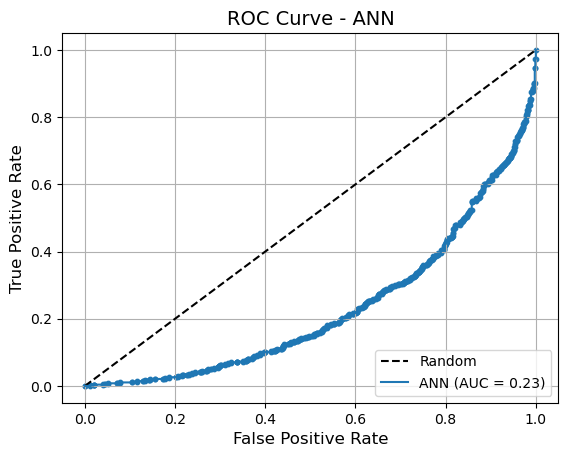

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


y_pred_prob_ann = ann.predict(high_level_test_scaled)  # shape: (n_samples, 1)
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob_ann)
auc_score = roc_auc_score(y_true, y_pred_prob_ann)

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fpr, tpr, label=f'ANN (AUC = {auc_score:.2f})')
plt.scatter(fpr, tpr, s=10)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - ANN', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()